In [183]:
import os, re, pandas as pd
import matplotlib.pyplot as plt

## Goals

- Calculate the total number of customers in each section

- Calculate the total number of customers in each section over time

- Display the number of customers at checkout over time

- Calculate the time each customer spent in the market

- Calculate the total number of customers in the supermarket over time.

- Our business managers think that the first section customers visit follows a different pattern than the following ones. Plot the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”).


In [184]:
csvs = re.compile('.*csv$')
files = list(filter(csvs.match, os.listdir('../00_data/')))
cust = pd.concat([pd.read_csv("../00_data/" + f,sep = ";", parse_dates = [0]) for f in files], axis = 0)


In [185]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24877 entries, 0 to 5103
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   timestamp    24877 non-null  datetime64[ns]
 1   customer_no  24877 non-null  int64         
 2   location     24877 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 777.4+ KB


In [186]:
cust.head()

,timestamp,customer_no,location
0,2019-09-03 07:02:00,1,fruit
1,2019-09-03 07:02:00,2,drinks
2,2019-09-03 07:03:00,3,dairy
3,2019-09-03 07:05:00,1,drinks
4,2019-09-03 07:06:00,4,dairy


In [187]:
cust.timestamp.dt.year

0       2019
1       2019
2       2019
3       2019
4       2019
        ... 
5099    2019
5100    2019
5101    2019
5102    2019
5103    2019
Name: timestamp, Length: 24877, dtype: int64

## Total number of customers in each section

<AxesSubplot:ylabel='location,location'>

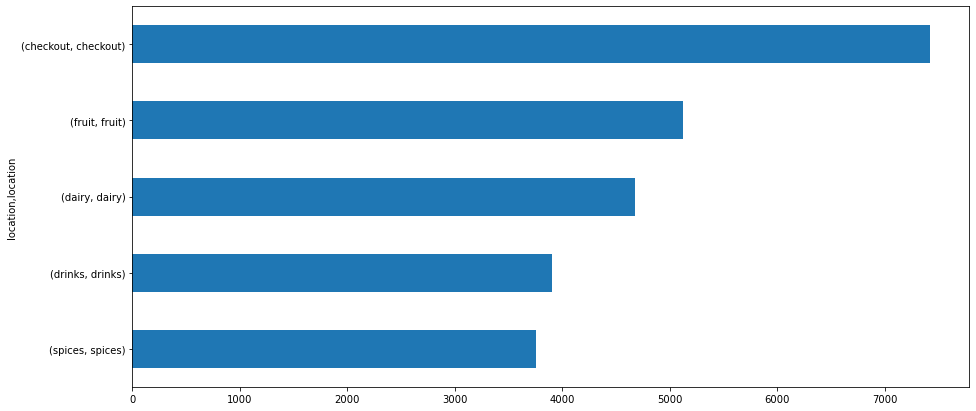

In [188]:
cust.groupby('location').location.value_counts().sort_values().plot.barh()

## Total number of customers in each section over time

In [189]:
# cust['dayhour'] = ["-".join([str(d), str(h)]) for d, h in zip(cust.timestamp.dt.weekday, cust.timestamp.dt.hour)]
# counts_over_time = pd.DataFrame(cust.groupby(['dayhour']).aggregate(n = ('location', 'value_counts'))).reset_index()

In [190]:
cust['timestamp_hour'] = cust.timestamp.dt.strftime('%Y-%m-%d %H')
counts_over_time = pd.DataFrame(cust.groupby(['timestamp_hour']).aggregate(n = ('location', 'value_counts'))).reset_index()


In [191]:
counts_over_time

,timestamp_hour,location,n
0,2019-09-02 07,checkout,92
1,2019-09-02 07,drinks,60
2,2019-09-02 07,dairy,59
3,2019-09-02 07,fruit,54
4,2019-09-02 07,spices,52
...,...,...,...
370,2019-09-06 21,checkout,52
371,2019-09-06 21,dairy,39
372,2019-09-06 21,fruit,36
373,2019-09-06 21,drinks,34


<AxesSubplot:xlabel='timestamp_hour', ylabel='n'>

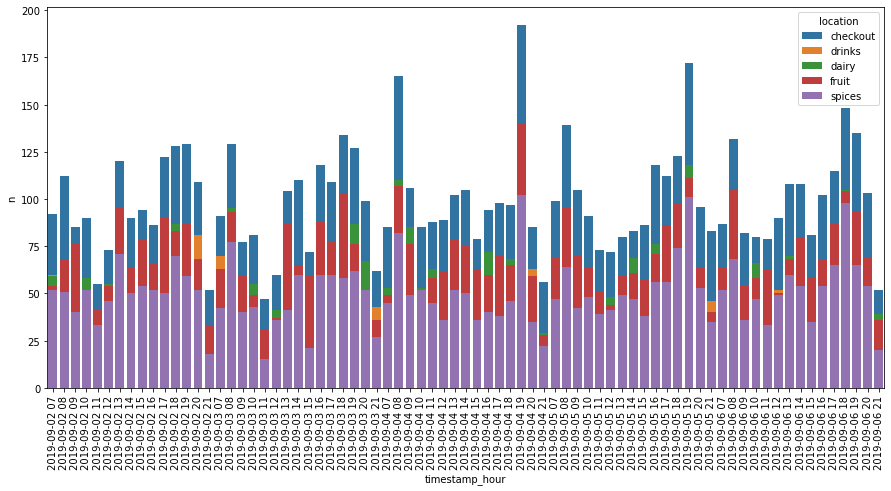

In [192]:
import seaborn as sns
plt.rcParams['figure.figsize'] = (15,7)
plt.xticks(rotation=90)
sns.barplot(data = counts_over_time, x = 'timestamp_hour', y = 'n', hue = 'location', dodge = False)

## Display the number of customers at checkout over time

<AxesSubplot:xlabel='timestamp_hour', ylabel='n'>

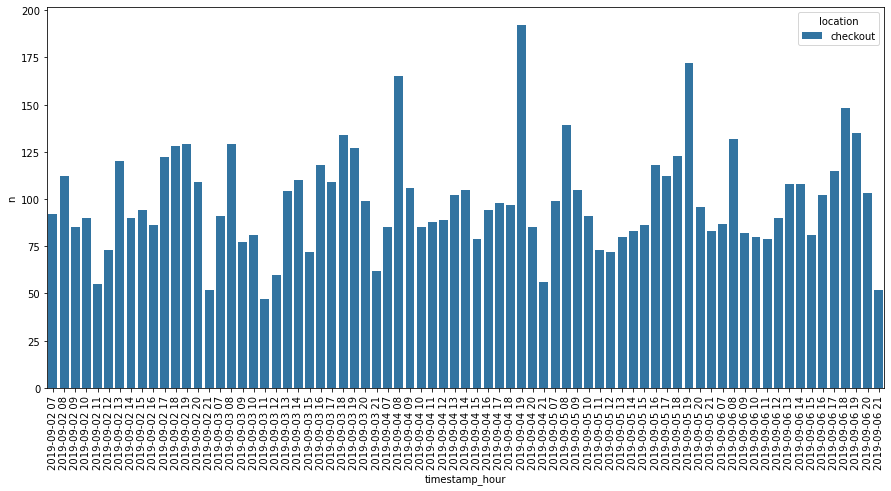

In [193]:
plt.xticks(rotation=90)
sns.barplot(data = counts_over_time.loc[counts_over_time.location == 'checkout', ], x = 'timestamp_hour', y = 'n', hue = 'location', dodge = False)

## Calculate the time each customer spent in the market

In [194]:
cust['day'] = cust.timestamp.dt.weekday
timespent = cust.groupby(['day', 'customer_no']).aggregate(time_spent = ('timestamp', lambda x: max(x) - min(x)))

In [195]:
timespent

time_spent
day customer_no                
0   1           0 days 00:02:00
    2           0 days 00:03:00
    3           0 days 00:02:00
    4           0 days 00:04:00
    5           0 days 00:01:00
...                         ...
4   1506        0 days 00:00:00
    1507        0 days 00:02:00
    1508        0 days 00:02:00
    1509        0 days 00:00:00
    1510        0 days 00:00:00

[7445 rows x 1 columns]

In [196]:
timespent.sort_values(by = 'time_spent', ascending = False)

time_spent
day customer_no                
3   1047        0 days 00:52:00
4   102         0 days 00:52:00
0   666         0 days 00:51:00
2   710         0 days 00:51:00
4   1238        0 days 00:49:00
...                         ...
0   1446        0 days 00:00:00
    1447        0 days 00:00:00
4   1506        0 days 00:00:00
    1509        0 days 00:00:00
    1510        0 days 00:00:00

[7445 rows x 1 columns]

0 time customers are treated differently. "when the shop closes, the remaining customers are rushed through the checkout. Their checkout is not recorded, so it may look as if they stay in the market forever."


/home/alex/.conda/envs/spiced/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='time_spent', ylabel='Density'>

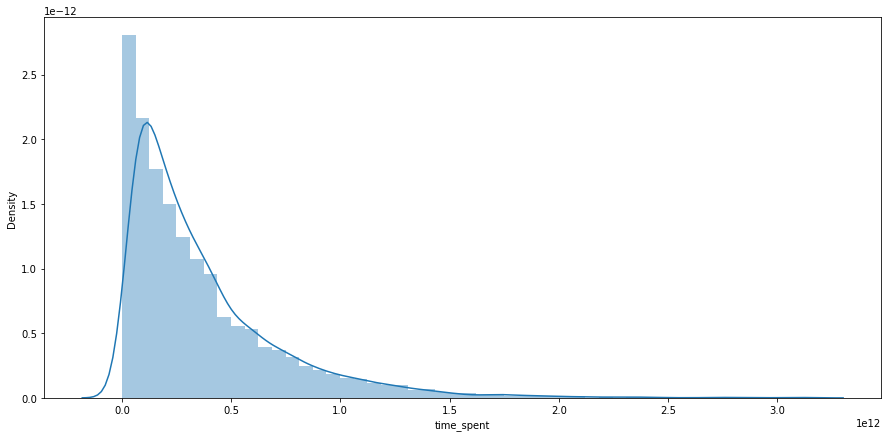

In [197]:
sns.distplot(a = timespent.time_spent)

/home/alex/.conda/envs/spiced/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='time_spent', ylabel='Density'>

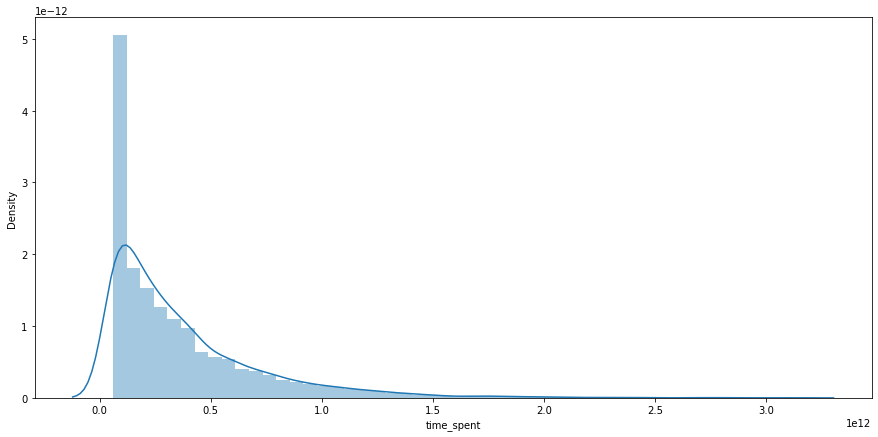

In [198]:
sns.distplot(a = timespent.time_spent[timespent.time_spent > pd.Timedelta(0, 'D')])

## Visiting behavior
- Our business managers think that the first section customers visit follows a different pattern than the following ones. Plot the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”).

In [199]:
def get_first(x):
    return x.iloc[0]

def get_subsequent(x):
    return "-".join(x.iloc[1:])



In [200]:
behavior = cust.groupby(['day', 'customer_no']).aggregate(first = ('location', get_first),  subsequent = ('location', get_subsequent))
behavior

first subsequent
day customer_no                   
0   1             dairy   checkout
    2             dairy   checkout
    3             dairy   checkout
    4             dairy   checkout
    5            spices   checkout
...                 ...        ...
4   1506          dairy           
    1507          dairy   checkout
    1508          dairy   checkout
    1509         drinks           
    1510         spices           

[7445 rows x 2 columns]

In [201]:
behaviour_counts = pd.DataFrame(behavior.groupby('first').subsequent.aggregate(n = 'value_counts').sort_values(by = 'n', ascending = False)).reset_index()

In [202]:
subset = behaviour_counts.groupby('first').head(10).sort_values(by = ['first', 'n'], ascending = False)

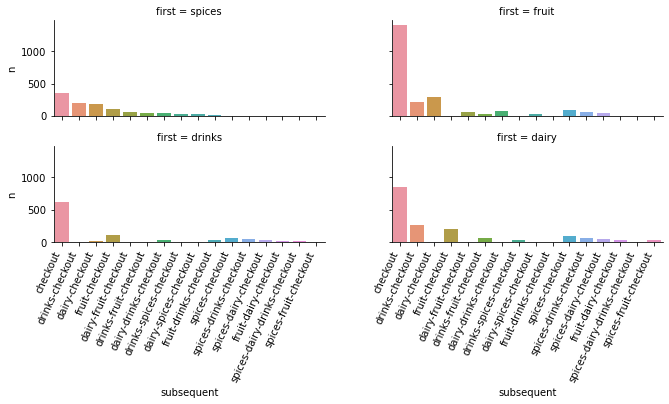

In [212]:
# plt.rcParams['figure.figsize'] = (4,4)

fig = sns.catplot(data = subset, x = 'subsequent', y = 'n', kind = 'bar', col = 'first', col_wrap = 2, height = 2, aspect = 2.5)
fig.set_xticklabels(rotation=65, horizontalalignment='right')
    

## Transition Matrix

In [231]:
state_after = cust.set_index('timestamp').groupby(['day', 'customer_no']).location.transform(lambda x: x.shift(-1))
state_before = cust.set_index('timestamp').groupby(['day', 'customer_no']).location.transform(lambda x: x)

transitions = pd.DataFrame({'before' : state_before, 'after' : state_after})

transitions.head(50)

transitions.loc[(transitions.after.isna()) & (transitions.before != 'checkout'), ].head(50)

,before,after
timestamp,,
2019-09-03 21:47:00,dairy,NaN
2019-09-03 21:50:00,dairy,NaN
2019-09-04 21:47:00,fruit,NaN
2019-09-04 21:48:00,spices,NaN
2019-09-04 21:49:00,dairy,NaN
2019-09-04 21:49:00,dairy,NaN
2019-09-04 21:49:00,fruit,NaN
2019-09-02 21:46:00,fruit,NaN
2019-09-02 21:47:00,dairy,NaN


All `NaN` afters which are not preceded by checkouts are before store closure. Safe to set them as checkout?

In [232]:
transitions.mask((transitions.after.isna()) & (transitions.before != 'checkout'), 'checkout', inplace=True)


In [233]:
transitions.loc[(transitions.after.isna()) & (transitions.before != 'checkout'), ].head(50)

,before,after
timestamp,,


In [238]:
subset = transitions.loc[transitions.before != 'checkout', ]
transition_matrix = pd.crosstab(subset['after'], subset['before'], normalize=0)
transition_matrix

before,dairy,drinks,fruit,spices
after,,,,
checkout,0.246056,0.282594,0.344479,0.126871
dairy,0.000000,0.041765,0.480299,0.477935
drinks,0.376901,0.000000,0.252353,0.370746
fruit,0.383218,0.369810,0.000000,0.246972
spices,0.379942,0.352060,0.267998,0.000000


In [243]:
transition_matrix.aggregate(func = sum, axis = 1)

after
checkout    1.0
dairy       1.0
drinks      1.0
fruit       1.0
spices      1.0
dtype: float64